<a href="https://colab.research.google.com/github/saikatpal26/Big-Data-Analytics-Project/blob/main/Big_Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Data Analytics Project**

Saikat Pal

Neeharika Naramala


---

Comments:


# **Initiate and Configure Spark**

---


In [ ]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 42 kB/s 
     |████████████████████████████████| 199 kB 47.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=cdb8917adb07b5e8f205f87f0a88f7497d19901e27c6c20c48fc5d7e50510d53
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
########## ONLY in Ubuntu Machine ##########
# Load Spark engine
!pip3 install -q findspark
import findspark
findspark.init()
########## ONLY in Ubuntu Machine ##########

In [ ]:
# linking with SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").config("spark.driver.maxResultSize", "4g").appName('Group115').getOrCreate()

# Note: If you want to work with RDD, you should use: "from pyspark import SparkContext, SparkConf"


# **Load Data**

---


In [ ]:
########## ONLY in Colab ##########
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')
########## ONLY in Colab ##########

Mounted at /content/drive


In [ ]:
# Load Data from Colab:

########## ONLY in Colab ##########
IDS_df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv", inferSchema=True)
########## ONLY in Colab ##########

In [ ]:
# Load Data from Ubuntu VMware:

########## ONLY in Ubuntu Machine ##########
IDS_df = spark.read.option("header", "true").csv("IDS2018/*.csv")
########## ONLY in Ubuntu Machine ##########

In [ ]:
# Print DF to make sure it is working
IDS_df.show()

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# The total number of attacks per label
IDS_df.select('Label').groupBy('Label').count().orderBy('count', ascending=False).show()

+--------------------+-------+
|               Label|  count|
+--------------------+-------+
|              Benign|5329908|
|    DDOS attack-HOIC| 686012|
|    DoS attacks-Hulk| 461912|
|                 Bot| 286191|
|      FTP-BruteForce| 193360|
|      SSH-Bruteforce| 187589|
|DoS attacks-SlowH...| 139890|
|DoS attacks-Golde...|  41508|
|DoS attacks-Slowl...|  10990|
|DDOS attack-LOIC-UDP|   1730|
|    Brute Force -Web|    611|
|    Brute Force -XSS|    230|
|       SQL Injection|     87|
+--------------------+-------+




# **Task 1 : Spark SQL**

---



In [ ]:
# Renaming some of the columns by removing spaces for easy access in spark SQL query

IDS = IDS_df.withColumnRenamed(IDS_df.columns[4], 'tot_fw_pk') \
      .withColumnRenamed(IDS_df.columns[5], 'tot_bw_pk') \
      .withColumnRenamed('Down/Up Ratio', 'down_up_ratio') \
      .withColumnRenamed('Pkt Size Avg', 'pkt_size_avg') \
      .withColumnRenamed('Fwd IAT Tot', 'fw_iat_tot') \
      .withColumnRenamed('Bwd IAT Tot', 'bw_iat_tot') \
      .withColumnRenamed('TotLen Fwd Pkts', 'tot_l_fw_pkt') \
      .withColumnRenamed('TotLen Bwd Pkts', 'tot_l_bw_pkt') \
      .withColumnRenamed('Fwd Pkt Len Mean', 'fwd_pkt_size_avg') \
      .withColumnRenamed('Bwd Pkt Len Mean', 'bwd_pkt_size_avg') \
      .withColumnRenamed('Pkt Len Min', 'Pkt_Len_Min') \
      .withColumnRenamed('Pkt Len Max', 'Pkt_Len_Max') \
      .withColumnRenamed('Fwd Blk Rate Avg', 'fw_pkt_blk_avg') \
      .withColumnRenamed('Bwd Blk Rate Avg', 'bw_pkt_blk_avg') \
      .withColumnRenamed('Subflow Fwd Pkts', 'subfl_fw_pk') \
      .withColumnRenamed('Subflow Bwd Pkts', 'subfl_bw_pk') \
      .withColumnRenamed('Fwd Header Len', 'fw_hdr_len') \
      .withColumnRenamed('Bwd Header Len', 'bw_hdr_len') \
      .withColumnRenamed('Fwd Pkt Len Max', 'Fwd_Pkt_Len_Max') \
      .withColumnRenamed('Active Max', 'Active_Max') \
      .withColumnRenamed('Active Min', 'Active_Min') \
      .withColumnRenamed('Idle Max', 'Idle_Max') \
      .withColumnRenamed('Idle Min', 'Idle_Min') \
      .withColumnRenamed('Fwd Pkts/s', 'fw_pkt_s') \
      .withColumnRenamed('Bwd Pkts/s', 'bw_pkt_s') \
      .withColumnRenamed('Flow Duration', 'flow_duration') \
      .withColumnRenamed('FIN Flag Cnt', 'fin_flag_count') \
      .withColumnRenamed('SYN Flag Cnt', 'syn_flag_count') \
      .withColumnRenamed('RST Flag Cnt', 'rst_flag_count') \
      .withColumnRenamed('PSH Flag Cnt', 'psh_flag_count') \
      .withColumnRenamed('ACK Flag Cnt', 'ack_flag_count') \
      .withColumnRenamed('URG Flag Cnt', 'urg_flag_count') \
      .withColumnRenamed('CWE Flag Count', 'cwe_flag_count') \
      .withColumnRenamed('ECE Flag Cnt', 'ece_flag_count')


IDS.createOrReplaceTempView("IDS_View")


## Query 1 : Use of COALESCE, COUNT, CASE...WHEN...THEN...END functions and GROUP BY clause.

-> In this dataset FIN, SYS, RST, PSH, ACK, URG, CWE, ECE -- 8 types of flags can be found. Possible values are 0, 1.
So, I have counted the number of occurences for each flag where it is set to 1, then result is being shown grouping by Label.

-> By observing this, we can understand for which type of attack which flag's packet was sent.

In [ ]:
# Query 1

query1 = spark.sql('SELECT Label, \
                      COALESCE(COUNT(CASE WHEN fin_flag_count = 1 THEN 1 END), 0) AS fin_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN syn_flag_count = 1 then 1 END), 0) AS syn_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN rst_flag_count = 1 then 1 END), 0) AS rst_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN psh_flag_count = 1 then 1 END), 0) AS psh_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN ack_flag_count = 1 then 1 END), 0) AS ack_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN urg_flag_count = 1 then 1 END), 0) AS urg_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN cwe_flag_count = 1 then 1 END), 0) AS cwe_flag_count_of_1,           \
                      COALESCE(COUNT(CASE WHEN ece_flag_count = 1 then 1 END), 0) AS ece_flag_count_of_1            \
               FROM IDS_View GROUP BY Label')
query1.show()

+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|               Label|fin_flag_count_of_1|syn_flag_count_of_1|rst_flag_count_of_1|psh_flag_count_of_1|ack_flag_count_of_1|urg_flag_count_of_1|cwe_flag_count_of_1|ece_flag_count_of_1|
+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|              Benign|              24744|             191456|             843753|            2096362|            1786845|             220385|                  0|             843748|
|      FTP-BruteForce|                  0|                  0|                  0|             193360|                  0|                  0|                  0|                  0|
|      SSH-Bruteforce|                  0|                  0|                  0|   

## Query 2 : Measurement of skewness of three columns/features which are - - average packet size, average packet size in forward direction, average packet size in backward direction.

-> I found only one occurence where it's negatively skewed for average packet size and average packet
size in backward direction, and all the other values are positively skewed.

-> In the horizontal bar graph output it can be clearly seen that negative skewness occured in DoS attacks-GoldenEye.

+--------------------+---------------------+-------------------------+-------------------------+
|               Label|skewness_pkt_size_avg|skewness_fwd_pkt_size_avg|skewness_bwd_pkt_size_avg|
+--------------------+---------------------+-------------------------+-------------------------+
|              Benign|    3.457466820724959|        9.208435168832544|        3.616833075658715|
|      FTP-BruteForce|                 null|                     null|                     null|
|      SSH-Bruteforce| 0.003675421644842...|     0.012122233503035054|     0.011926186769460025|
|DoS attacks-Slowl...|   0.5238600942264151|      0.24316406074631092|        8.625975664681766|
|DoS attacks-Golde...| -0.35986534074485166|       1.0847456124286057|      -0.2554891102197969|
|DoS attacks-SlowH...|                 null|                     null|                     null|
|    DoS attacks-Hulk|    4.008795620037098|        4.233489171741629|        3.972402604690482|
|DDOS attack-LOIC-UDP|   13.31

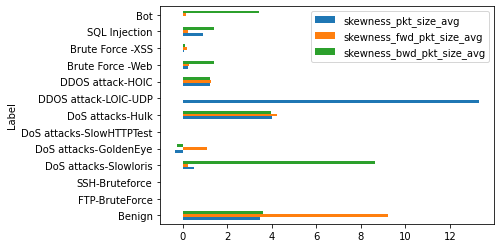

In [ ]:
# Query 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


query2 = spark.sql('SELECT Label, \
                               skewness(pkt_size_avg) AS skewness_pkt_size_avg, \
                               skewness(fwd_pkt_size_avg) AS skewness_fwd_pkt_size_avg, \
                               skewness(bwd_pkt_size_avg) AS skewness_bwd_pkt_size_avg \
                        FROM IDS_View \
                        GROUP BY Label')
query2.show()

pandas_df = query2.toPandas()
pandas_df.plot(x='Label', y=['skewness_pkt_size_avg', 'skewness_fwd_pkt_size_avg', 'skewness_bwd_pkt_size_avg'],  kind='barh')

## Query 3 : USE of KURTOSIS(the sharpness of the peak of a frequency-distribution curve) function"

-> I have calculated the kurtosis of Down Up Ratio, Average number of pakets in a subflow in forward direction and
Average number of pakets in a subflow in backward direction.

-> For filtering  purpose and better understanding, I exlcude "Benign" and "Bot" type of attacks (Label).

-> The negative values in kurtosis tell that it has less in the tails than the normal distribution.

-> In the plot, the downward stacked bars represent those negative values which are below 0 level in the graph.


+--------------------+--------------------+--------------------+-------------------+
|               Label|  kurt_down_up_ratio|    kurt_subfl_fw_pk|   kurt_subfl_bw_pk|
+--------------------+--------------------+--------------------+-------------------+
|      FTP-BruteForce|                null|                null|               null|
|      SSH-Bruteforce| -0.4767700141770552|  -1.978288574013581|-1.9843458613162395|
|DoS attacks-Slowl...|-0.09363255364166889| -1.8789370255711069| -1.133737901412833|
|DoS attacks-Golde...| -1.8107632889161995|   11.27602990698847| -1.581657250751338|
|DoS attacks-SlowH...| -1.5830949814936461| -1.5830949814936461|-1.5830949814936461|
|    DoS attacks-Hulk|  14.113510964000156|  13.518137711387048| 14.113579262600052|
|DDOS attack-LOIC-UDP|                null|   6.609646114726187|               null|
|    DDOS attack-HOIC|  -0.497073793075264| -0.4970737930752711| -0.497073793075264|
|    Brute Force -Web|   3.982378736830846|0.023481783847280724|0

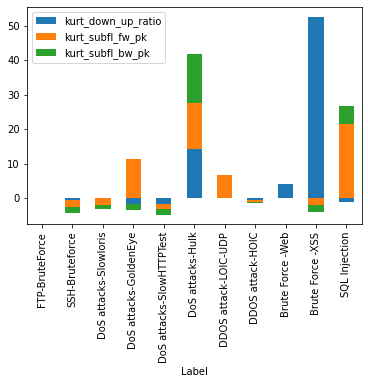

In [ ]:
# Query 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IDS_Query3 = spark.sql('SELECT Label, \
                               KURTOSIS(down_up_ratio) AS kurt_down_up_ratio, \
                               KURTOSIS(subfl_fw_pk) AS kurt_subfl_fw_pk, \
                               KURTOSIS(subfl_bw_pk) AS kurt_subfl_bw_pk \
                               FROM IDS_View \
                               WHERE Label NOT IN ("Benign","Bot") \
                               GROUP BY Label')
IDS_Query3.show()

pandas_df = IDS_Query3.toPandas()
pandas_df = pandas_df.fillna(0)
pandas_df.plot(x='Label', y=['kurt_down_up_ratio','kurt_subfl_fw_pk', 'kurt_subfl_bw_pk'], kind='bar',stacked=True)


## Query 4 : I have used COUNT function to count the number of rows or entries for each label, AVG function to calculate average duration of a flow, SUM function to calculate total number of packets per second in forward as well as backward direction.

Then plotted in a bar graph. As we can see the
the heighest numbers of attacks are Benign and lowest is SQL Injection. For
better understanding the plot I have used logarithmic scale of y axis as the
Count value is huge in some cases.


+--------------------+---------------+-----------------+---------------------+---------------------+
|         attack_type|total_frequency|avg_flow_duration|total_fwd_pkt_per_sec|total_bwd_pkt_per_sec|
+--------------------+---------------+-----------------+---------------------+---------------------+
|              Benign|        5329908|     1.31734914E7|   1.2534096997582E11|    1.481694257067E10|
|    DDOS attack-HOIC|         686012|          9720.32|       5.1380417307E8|       1.3679091601E8|
|    DoS attacks-Hulk|         461912|        301755.61|       5.5609542506E8|           2189673.18|
|                 Bot|         286191|         75298.91|        5.886281289E8|        5.144763052E7|
|      FTP-BruteForce|         193360|              3.8|   1.1496447064787E11|   1.1496447064787E11|
|      SSH-Bruteforce|         187589|        183349.68|    1.487539175794E10|    1.486142899126E10|
|DoS attacks-SlowH...|         139890|              4.9|    5.138859810815E10|    5.1388598

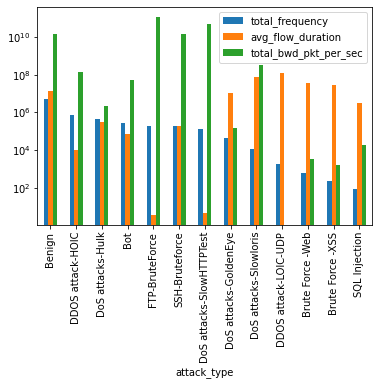

In [ ]:
# Query 4

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

IDS_Query4 = spark.sql('SELECT Label AS attack_type,                        \
                      COUNT(*) AS total_frequency,                       \
                      ROUND(AVG(flow_duration), 2) AS avg_flow_duration,  \
                      ROUND(SUM(fw_pkt_s), 2) AS total_fwd_pkt_per_sec,   \
                      ROUND(SUM(bw_pkt_s), 2) AS total_bwd_pkt_per_sec    \
                   FROM IDS_View                                           \
                   GROUP BY Label                                           \
                   ORDER BY total_frequency DESC')


IDS_Query4.show()


pandas_df = IDS_Query4.toPandas()
pandas_df.sort_values(by='total_frequency', ascending=False).plot(x='attack_type', \
                                                           y=['total_frequency', \
                                                           'avg_flow_duration', \
                                                           'total_bwd_pkt_per_sec'], \
                                                           kind='bar', logy=True)



## Query 5 :  Querying each name of attack with the attacked port and number of attacks on each port except Benign

Using group by on multiple coulmns i.e. Label and Dst Port with a new column count to show the number of attacks with each attack name with its count.

In [ ]:
# Query 5

IDS_df.createOrReplaceTempView("ca")
sqlDF = spark.sql("SELECT * from ca")

sqlDF = spark.sql("SELECT `Label`, `Dst Port`, count(*) from ca where `Label` <> 'Benign'  group by `Label`, `Dst Port`;")

sqlDF.show()



+--------------------+--------+--------+
|               Label|Dst Port|count(1)|
+--------------------+--------+--------+
|      SSH-Bruteforce|      21|      30|
|      FTP-BruteForce|      21|  193360|
|      SSH-Bruteforce|      22|  187559|
|DoS attacks-Slowl...|      80|   10990|
|DoS attacks-Golde...|      80|   41508|
|DoS attacks-SlowH...|      21|  139890|
|    DoS attacks-Hulk|      80|  461912|
|DDOS attack-LOIC-UDP|      80|    1730|
|    DDOS attack-HOIC|      80|  686012|
|    Brute Force -Web|      80|     460|
|       SQL Injection|      80|      87|
|    Brute Force -XSS|      80|     225|
|    Brute Force -XSS|     500|       4|
|    Brute Force -Web|       0|      21|
|    Brute Force -Web|      67|       2|
|    Brute Force -XSS|      67|       1|
|    Brute Force -Web|   31808|       1|
|    Brute Force -Web|     500|     126|
|    Brute Force -Web|      22|       1|
|                 Bot|   50922|       3|
+--------------------+--------+--------+
only showing top

## Query 6 : Specifying the type of attack such as Network Attack or Database attack according to the name of attack

Used CASE, GROUP BY to specify the type of attack sucha as Database attack if its SQL Injection and NEtwork attack if its XSS attack with its count and ordering by the number of attacks in descending order.



In [ ]:
# Query 6

IDS_df.createOrReplaceTempView("ca")

attackTypes = spark.sql("SELECT attacks, COUNT(*) AS counts FROM \
           (SELECT 'Label','Flow Duration', \
           CASE WHEN Label = 'SQL Injection' THEN 'Database Attack' WHEN Label like '%-XSS' THEN 'Network Attack' ELSE 'Others' END AS attacks FROM ca) \
           GROUP BY attacks ORDER BY counts DESC ")

attackTypes.show()



+---------------+-------+
|        attacks| counts|
+---------------+-------+
|         Others|7339701|
| Network Attack|    230|
|Database Attack|     87|
+---------------+-------+



## Query 7 : Querying the counts of normal and harmful connections and their visualisation

Using the CASE command to get output label i.e. benign and harmful. Then counting the type of connections using COUNT and BROUPBY methods. Then plotting the queried results in a bar chart showing counts and types of connections. It gives us the output visualisation which shows clearly that normal connections are more in the labels then harmful ones.

In [ ]:
IDS_df.createOrReplaceTempView('IDS_dfView')

+-----------+-------+
|connections| counts|
+-----------+-------+
|     normal|5329908|
|    harmful|2010110|
+-----------+-------+

None


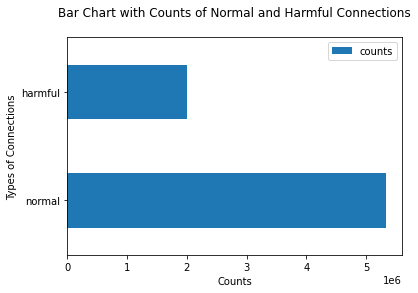

In [ ]:
# Query 7

# counting normal and harmful connections
import matplotlib.pyplot as plt
query_label_counts = spark.sql("SELECT connections, COUNT(*) AS counts FROM \
           (SELECT protocol, timestamp, flow_duration, tot_fwd_pkts, tot_bwd_pkts, flow_byts_s, flow_pkts_s, \
           CASE WHEN label = 'Benign' THEN 'normal' ELSE 'harmful' END AS connections FROM IDS_dfView) \
           GROUP BY connections ORDER BY counts DESC ")
print(query_label_counts.show())

# plotting the counts of normal and harmful connections in bar chart
label_counts_df = query_label_counts.toPandas()
label_counts_df.plot(x ='connections', y='counts', kind = 'barh')
plt.title('Bar Chart with Counts of Normal and Harmful Connections\n')
plt.ylabel('Types of Connections')
plt.legend()
plt.xlabel('Counts')
plt.show()

## Query 8 : Creating Groups and then Comparing Statistics of 'Brute Force -Web', 'SQL Injection' and 'Benign' using the mean, std, skewness, variance and kurtosis for each set for the flow duration column ('flow_duration')

Using GROUPBY for 'label' column and 'protocol' column in first and second levvels repectively then using GROUPING SETS to create different multiple sets for both the protocol and label columns. Next Selecting only rows where the labels are benign or Brute Force -Web using the WHERE Command. Also we need to remove the groups having null labels with HAVING command. Finally Calculate Statistics of 'flow duration' column i.e, Sum, STD, Variance etc. for each sets of groups . Then plotting the output into a barchart which shows use that Brute Force -Web Connections are the most high average flow duration connections. Variance is highest from Benign.

+----------------+--------+-------+-----------------+--------------------+--------------------+--------------------+----------------------+----------------------+
|           label|protocol| counts|flow_duration_sum|   flow_duration_avg|   flow_duration_std|   flow_duration_var|Flow_duration_skewness|flow_duration_kurtosis|
+----------------+--------+-------+-----------------+--------------------+--------------------+--------------------+----------------------+----------------------+
|          Benign|       0|  76011|    6479622688844| 8.526155886211298E7| 7.205737315892666E9|5.192265026564805E19|    -98.73808603140058|    10244.823401637384|
|          Benign|    null|5329908|   76309174175711|1.4317202964207355E7| 8.610673415468632E8|7.414369666785824E17|    -825.2398216548578|     716754.8629020822|
|          Benign|       6|3898104|   68618559408967|1.7603060207979828E7| 3.475705905031859E7|1.208053153827333...|    1.9514524026038906|    2.2902833809307444|
|          Benign|    

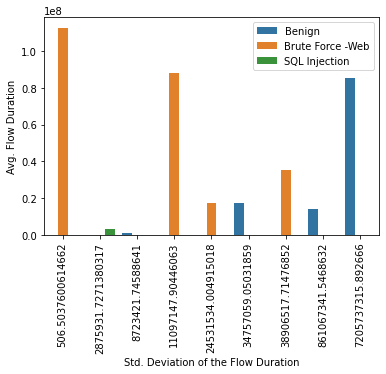

In [ ]:
# Query 8

grp_stats_query = spark.sql("SELECT label, protocol, COUNT(*) as counts, SUM(CAST(flow_duration AS INTEGER)) AS flow_duration_sum, \
                  AVG(CAST(flow_duration AS INTEGER)) AS flow_duration_avg, stddev_pop(flow_duration) AS flow_duration_std, \
                  var_pop (flow_duration) AS flow_duration_var, skewness(flow_duration) AS Flow_duration_skewness, \
                  kurtosis(flow_duration) AS flow_duration_kurtosis  FROM IDS_dfView WHERE label IN ('Benign', 'Brute Force -Web', 'SQL Injection') \
                  GROUP BY GROUPING SETS ((label, protocol), (label), (protocol), ()) \
                  HAVING label <>'null' ORDER BY label")
print(grp_stats_query.show())


# convert sql df to Pandas DF
grp_stats_query_DF = grp_stats_query.toPandas()


# using seaborn to plot labels against flow duration, using count as 3rd variable
import seaborn as sns
sns.barplot(data=grp_stats_query_DF, x='flow_duration_std', y='flow_duration_avg', hue='label',
            ci='sd')
# dodge offsets the 2 lines slightly since they are overlapping
plt.xticks(rotation=90)
plt.xlabel('Std. Deviation of the Flow Duration')
plt.ylabel('Avg. Flow Duration')
plt.legend()
plt.show()


# **Task 2 - Part1 : PySpark**

---


## Analytical Method 1(a) : Descriptive statistics
-> I have derived count, mean, standard deviation, minimum and maximum value of the Active Max (Maximum time a flow was active before becoming idle), Active Min (Minimum time a flow was active before becoming idle), Idle Max (Maximum time a flow was idle before becoming active), Idle Min (Minimum time a flow was idle before becoming active) columns.

  summary          Active_Max          Active_Min             Idle_Max  \
0   count             7340018             7340018              7340018   
1    mean  102495.23225392636  43885.050490339396     5632559.51359697   
2  stddev  1311250.3100639815    851165.225199727  9.298528373349414E8   
3     min                 0.0                 0.0                  0.0   
4     max        1.13170569E8        1.13170569E8           9.79781E11   

              Idle_Min  
0              7340018  
1    4392848.859654976  
2  9.319939330716385E7  
3                  0.0  
4           2.39934E11  


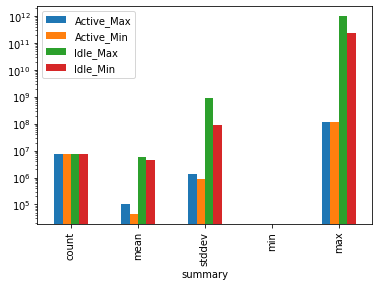

In [ ]:
# Analytical method 1(a)

import pandas as pd

method1 = IDS.select('Active_Max', 'Active_Min', 'Idle_Max', 'Idle_Min').describe()
method1 = method1.toPandas()
print(method1)

method1['Active_Max'] = method1['Active_Max'].astype(float)
method1['Active_Min'] = method1['Active_Min'].astype(float)
method1['Idle_Max'] = method1['Idle_Max'].astype(float)
method1['Idle_Min'] = method1['Idle_Min'].astype(float)

method1.plot(kind = 'bar', x = 'summary', y = ['Active_Max', 'Active_Min', 'Idle_Max', 'Idle_Min'], logy=True)


## Analytical Method 1(b)

Using the descriptive stats like with describe method, skewness and the kurtosis on columns 'tot_fwd_pkts', 'tot_bwd_pkts' and 'flow_duration'.

Describe method give basic statistics:
1. count
2. mean or avg
3. std. deviation
4. minimum
5. max

- Skewness gives distributional symmetry of selected columns
- Kurtosis gives tailedness in distribution of columns


- Flow duration: shows high stadard deviation
- Total Fwd Pkts and Tot_Bwd_pkts values show greater extreme deviations to the right while flow duraiton is negatively skewing gives idea about left extreme deviations
- They all have kurtosis value greater than 3.
- Added is the visualisation for these columns to see skewness and kurtosis.

In [ ]:
# calculating stats using describe method
IDS_df.select('tot_fwd_pkts', 'tot_bwd_pkts', 'flow_duration').describe().show()

+-------+------------------+------------------+-------------------+
|summary|      tot_fwd_pkts|      tot_bwd_pkts|      flow_duration|
+-------+------------------+------------------+-------------------+
|  count|           7340018|           7340018|            7340018|
|   mean|32.943601500704766|5.9616829277530385|   9795900.24853345|
| stddev|1854.0592777044114| 171.3252494015615|7.337834016610662E8|
|    min|                 1|                 0|      -110116000000|
|    max|             99983|               999|           99999994|
+-------+------------------+------------------+-------------------+



In [ ]:
# getting skewness
from pyspark.sql import functions as f
IDS_df.select(f.skewness(IDS_df['tot_fwd_pkts']),f.skewness(IDS_df['tot_bwd_pkts']),f.skewness(IDS_df['flow_duration'])).show()

+----------------------+----------------------+-----------------------+
|skewness(tot_fwd_pkts)|skewness(tot_bwd_pkts)|skewness(flow_duration)|
+----------------------+----------------------+-----------------------+
|     70.24342939993414|     229.0366048434875|     -968.2875787330275|
+----------------------+----------------------+-----------------------+



In [ ]:
# getting kurtosis
IDS_df.select(f.kurtosis(IDS_df['tot_fwd_pkts']),f.kurtosis(IDS_df['tot_bwd_pkts']),f.kurtosis(IDS_df['flow_duration'])).show()

+----------------------+----------------------+-----------------------+
|kurtosis(tot_fwd_pkts)|kurtosis(tot_bwd_pkts)|kurtosis(flow_duration)|
+----------------------+----------------------+-----------------------+
|     5242.845100432364|     102244.3850898364|      986876.8061077582|
+----------------------+----------------------+-----------------------+



In [ ]:
# dataframe from the 3 cols
df_stats = spark.sql('SELECT tot_fwd_pkts, tot_bwd_pkts, flow_duration FROM IDS_dfView').toPandas()
df_stats.head(5)



,tot_fwd_pkts,tot_bwd_pkts,flow_duration
0,3,0,112641719
1,3,0,112641466
2,3,0,112638623
3,15,10,6453966
4,14,11,8804066


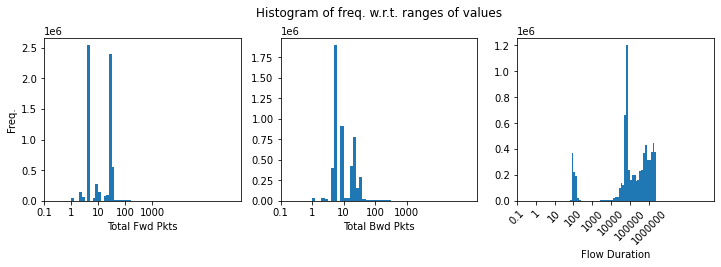

In [ ]:
import numpy as np
# adding visualisation
plt.figure(figsize=[12,3])#setting fig size
# setting bin size
bin_size_fwd = 10**np.arange(0, 6 +.1, .1)


## first plot
plt.subplot(1,3,1)# setting subplots
# transform main scale to log scale using the min and max
ticks = [.1, 1, 10, 100, 1000] #set x ticks
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=df_stats, x='tot_fwd_pkts', bins=bin_size_fwd)
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.xlabel('Total Fwd Pkts')
plt.ylabel('Freq.')


# second plot
plt.subplot(1,3,2) #subplot second
bin_size_bwd = 10**np.arange(0, 5 +.1, .1)
# set x-ticks
ticks = [.1, 1, 10, 100, 1000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=df_stats, x='tot_bwd_pkts', bins=bin_size_bwd)
plt.xscale('log')
plt.xticks(ticks, ticks);
plt.title('Histogram of freq. w.r.t. ranges of values\n')
plt.xlabel('Total Bwd Pkts');

# third plot
plt.subplot(1,3,3)
bin_size_fl = 10**np.arange(0, 9 +.1, .1)
# set x-ticks
ticks = [.1, 1, 10, 100, 1000,10000,100000, 1000000]
tick_name = ('{:0.1f}'.format(v) for v in ticks)
plt.hist(data=df_stats, x='flow_duration', bins=bin_size_fl)
plt.xscale('log')
plt.xticks(ticks, ticks)
plt.xlabel('Flow Duration')
plt.xticks(rotation=45)
plt.show()


## Analytical Method 2(a) : Statistical Correlation
-> Here, I have calculated the correlation between "total size of packet in forward direction" and "total size of packet in backward direction". The correlation between these two is 0.002 approx. i.e. these two are very very weakly related to each other. Or, we can say forward packet size is not related with backward packet size at all.

Then I have calculated correlation between "Maximum size of packet in forward
direction" and "Average size of packet in forward direction". In this case, correlation
between these two is 0.9 approximately. Hence, Maximum size and Average size
of packet in forward direction are highly related to each other.

In [ ]:
# Analytical method 2(a)


from pyspark.sql.functions import *

method2 = IDS.stat.corr('tot_l_fw_pkt','tot_l_bw_pkt')
print('Correlation between total size of packet in forward direction and the \
total size of packet in backward direction is =', method2)


method2_ = IDS.stat.corr('Fwd_Pkt_Len_Max','fwd_pkt_size_avg')
print('Correlation between Maximum size of packet in forward direction and \
Average size of packet in forward direction is =', method2_)


Correlation between total size of packet in forward direction and the total size of packet in backward direction is = 0.0020639092409111813
Correlation between Maximum size of packet in forward direction and Average size of packet in forward direction is = 0.9127232272128311


## Analytical Method 2(b)
###Using Correlation
Correlation provides insights about the strength of the relations between features in dataset pairwise. The relationship can be either +tive or -tive or Zero

In [ ]:
# Analytical method 2(b)

# IDS18_corr_DF = IDS_df #creating a df for correlation
IDS18_corr_DF = IDS_df.drop('dst_port').drop('timestamp').drop('protocol').drop('label')
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_blk_rate_avg", IDS18_corr_DF.fwd_blk_rate_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_blk_rate_avg", IDS18_corr_DF.fwd_blk_rate_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_duration", IDS18_corr_DF.flow_duration.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_pkt_len_std", IDS18_corr_DF.fwd_pkt_len_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("tot_bwd_pkts", IDS18_corr_DF.tot_bwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("tot_len_fwd_pkts", IDS18_corr_DF.tot_len_fwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("tot_len_bwd_pkts", IDS18_corr_DF.tot_len_bwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fw_pkt_len_max", IDS18_corr_DF.fw_pkt_len_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fw_pkt_len_min", IDS18_corr_DF.fw_pkt_len_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_pkt_len_avg", IDS18_corr_DF.fwd_pkt_len_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkt_len_max", IDS18_corr_DF.bwd_pkt_len_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkt_len_min", IDS18_corr_DF.bwd_pkt_len_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkt_len_avg", IDS18_corr_DF.bwd_pkt_len_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkt_len_std", IDS18_corr_DF.bwd_pkt_len_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_byts_s", IDS18_corr_DF.flow_byts_s.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_pkts_s", IDS18_corr_DF.flow_pkts_s.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_iat_avg", IDS18_corr_DF.flow_iat_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_iat_std", IDS18_corr_DF.flow_iat_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_iat_max", IDS18_corr_DF.flow_iat_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("flow_iat_min", IDS18_corr_DF.flow_iat_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_iat_tot", IDS18_corr_DF.fwd_iat_tot.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_iat_avg", IDS18_corr_DF.fwd_iat_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_iat_std", IDS18_corr_DF.fwd_iat_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_iat_max", IDS18_corr_DF.fwd_iat_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_iat_min", IDS18_corr_DF.fwd_iat_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_iat_tot", IDS18_corr_DF.bwd_iat_tot.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_iat_avg", IDS18_corr_DF.bwd_iat_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_iat_std", IDS18_corr_DF.bwd_iat_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_iat_min", IDS18_corr_DF.bwd_iat_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_iat_max", IDS18_corr_DF.bwd_iat_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_psh_flags", IDS18_corr_DF.fwd_psh_flags.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_psh_flags", IDS18_corr_DF.bwd_psh_flags.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_urg_flags", IDS18_corr_DF.fwd_urg_flags.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_urg_flags", IDS18_corr_DF.bwd_urg_flags.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_header_len", IDS18_corr_DF.fwd_header_len.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_header_len", IDS18_corr_DF.bwd_header_len.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_pkts_s", IDS18_corr_DF.fwd_pkts_s.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkts_s", IDS18_corr_DF.bwd_pkts_s.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_len_min", IDS18_corr_DF.pkt_len_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_len_std", IDS18_corr_DF.pkt_len_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_len_max", IDS18_corr_DF.pkt_len_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_len_avg", IDS18_corr_DF.pkt_len_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_len_var", IDS18_corr_DF.pkt_len_var.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fin_flag_cnt", IDS18_corr_DF.fin_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("syn_flag_cnt", IDS18_corr_DF.syn_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("rst_flag_cnt", IDS18_corr_DF.rst_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("psh_flag_cnt", IDS18_corr_DF.psh_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("ack_flag_cnt", IDS18_corr_DF.ack_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("urg_flag_cnt", IDS18_corr_DF.urg_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("cwe_flag_cnt", IDS18_corr_DF.cwe_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("ece_flag_cnt", IDS18_corr_DF.ece_flag_cnt.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("down_up_ratio", IDS18_corr_DF.down_up_ratio.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("pkt_size_avg", IDS18_corr_DF.pkt_size_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_seg_size_avg", IDS18_corr_DF.fwd_seg_size_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_seg_size_avg", IDS18_corr_DF.bwd_seg_size_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_byts_blk_avg", IDS18_corr_DF.fwd_byts_blk_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_pkts_blk_avg", IDS18_corr_DF.fwd_pkts_blk_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_byts_blk_avg", IDS18_corr_DF.bwd_byts_blk_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_pkts_blk_avg", IDS18_corr_DF.bwd_pkts_blk_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_blk_rate_avg", IDS18_corr_DF.bwd_blk_rate_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("subflow_fwd_pkts", IDS18_corr_DF.subflow_fwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("subflow_fwd_byts", IDS18_corr_DF.subflow_fwd_byts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("subflow_bwd_pkts", IDS18_corr_DF.subflow_bwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("subflow_bwd_byts", IDS18_corr_DF.subflow_bwd_byts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("init_fwd_win_byts", IDS18_corr_DF.init_fwd_win_byts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("bwd_win_byts", IDS18_corr_DF.bwd_win_byts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_act_data_pkts", IDS18_corr_DF.fwd_act_data_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("fwd_seg_size_min", IDS18_corr_DF.fwd_seg_size_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("active_avg", IDS18_corr_DF.active_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("active_std", IDS18_corr_DF.active_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("active_max", IDS18_corr_DF.active_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("active_min", IDS18_corr_DF.active_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("idle_avg", IDS18_corr_DF.idle_avg.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("idle_std", IDS18_corr_DF.idle_std.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("idle_max", IDS18_corr_DF.idle_max.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("idle_min", IDS18_corr_DF.idle_min.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.withColumn("tot_fwd_pkts", IDS18_corr_DF.tot_fwd_pkts.cast("integer"))
IDS18_corr_DF = IDS18_corr_DF.na.drop()
# IDS18_corr_DF.take(5)


In [ ]:
# create vector col from feature cols
from pyspark.ml.feature import VectorAssembler
vec_col = "corr_features"
assembler = VectorAssembler(inputCols=IDS18_corr_DF.columns, outputCol= vec_col)
vec_df = assembler.transform(IDS18_corr_DF).select(vec_col)

In [ ]:

# get correlation matrix
from pyspark.ml.stat import Correlation
matrix_corr = Correlation.corr(vec_df, vec_col)
matrix_corr.show(truncate=False)
#matrix list from an array
matrix_arr = matrix_corr.collect()[0][0].toArray().tolist()
# array to dataframe
matrix_corr_df = spark.createDataFrame(matrix_arr, IDS18_corr_DF.columns)
matrix_corr_df.show(truncate=False)

#spark df to pandas df
matrix_corr_df_pandas = matrix_corr_df.toPandas()
matrix_corr_df_pandas

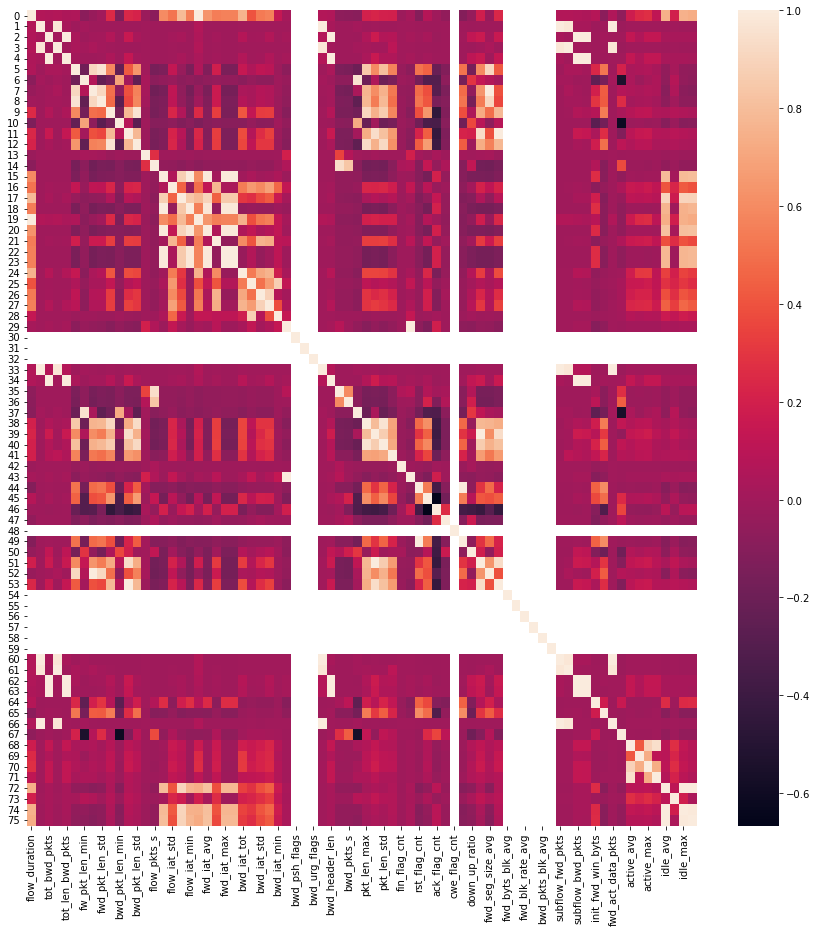

In [ ]:
# visualisation
import seaborn as sns
# correlation plot for the product
plt.figure(figsize=[15,15])
sns.heatmap(matrix_corr_df_pandas)
plt.show()


## Analytical Method 3 : Kernel Density Estimation

-> I have estimated the kernel density of Total bytes used for headers in the forward direction and Total bytes used for headers in the backward direction.

-> Kernel density estimation extrapolates data to an estimated population probability density function.

-> The smoothness of the kernel density estimate illustrates how kernel density estimates converge faster to the true underlying density for continuous random variables. This can be illustrated by observing the output gaph.

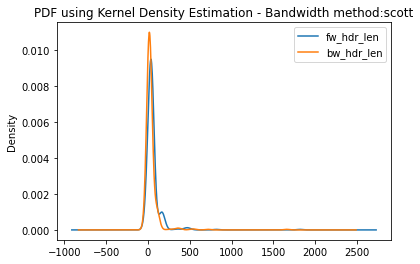

In [ ]:
# Analytical method 3

import matplotlib.pyplot as plt

method3 = spark.sql('SELECT fw_hdr_len, bw_hdr_len FROM IDS_View LIMIT 400')

pandas_df = method3.toPandas()


# Plot PDF using KDE with different bandwidth values.
# If bw_method value is None (default), ‘scott’ is used.
pandas_df.plot.kde(title="PDF using Kernel Density Estimation - Bandwidth method:scott")

plt.show(block=True)


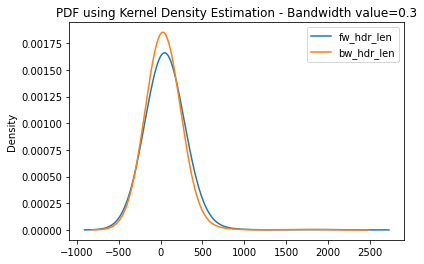

In [ ]:
# Using different value for the bandwidth parameter, i.e., bw_method=2 in this case.
pandas_df.plot.kde(bw_method=2, title="PDF using Kernel Density Estimation - Bandwidth value=0.3")

**Kernel Density Estimation** of the columns "The average
 number of packets in a sub flow in the forward direction" and "The average
 number of packets in a sub flow in the backward direction", to estimate the
 probability density function of these random variables based on kernels as
 weights. KDE is a non-parametric method to calculate pdf.

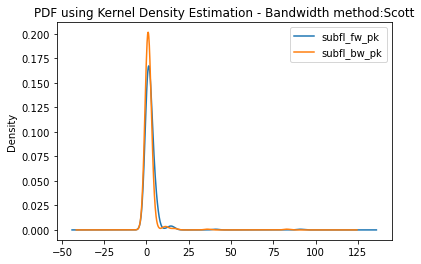

In [ ]:
# More KDE Examples


sql = spark.sql('SELECT subfl_fw_pk, subfl_bw_pk FROM IDS_View LIMIT 300')

pandas_df = sql.toPandas()


# Plot PDF using KDE with different bandwidth values

pandas_df.plot.kde(title="PDF using Kernel Density Estimation - Bandwidth method:Scott")
plt.show(block=True)


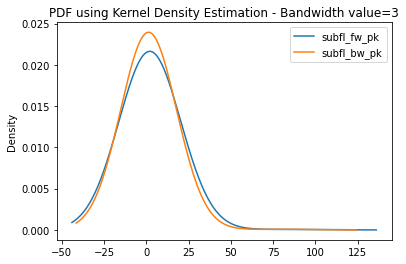

In [ ]:
pandas_df.plot.kde(bw_method=3, title="PDF using Kernel Density Estimation - Bandwidth value=3")

plt.show(block=True)


## Analytical Method 4 : Descriptive statistics for the field "Total Number of forward packets" (Tot Fwd Pkts) -- Making use of UDF (User Defined Function)

-> Filter forward packets per sec values in range of below 0.5M, 0.5M to 1M, 1M to 2M, 2M to 3M, over 3M.

->  Calculating various statistical measures like mean, minimum,
 maximum, standard deviation, last value and skewness of the column total forward packets has been shown with respect to forward packets per second as a summary in a table-like structure.

 -> Finally, showing the bar chart for the Percentage of values which falls under particular category.

In [ ]:
# Analytical method 4

# Check for missing values in the dataframe
from pyspark.sql.functions import isnan, when, count, col
IDS_df.select([count(when(isnan(c),c)).alias(c) for c in IDS_df.columns]).show()

+--------+--------+---------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-----------+-----------+-------------+------------+------------+------------+-----------+------------+-----------+-----------+-----------+-----------+------------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+------------+-----------+-----------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------------+-----------------+----------------+-

In [ ]:
# Delete Flow Byts/s column as it has some missing values
df = IDS_df.drop('Flow Byts/s')

# Create a User Defined Function (UDF)
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def udf_f(fwd_pkt_s):
  if (fwd_pkt_s < 500000):
    return "Below 0.5M"
  elif (fwd_pkt_s >= 500000 and fwd_pkt_s < 1000000):
    return "Between 0.5M and 1M"
  elif (fwd_pkt_s >= 1000000 and fwd_pkt_s < 2000000):
    return "Between 1M and 2M"
  elif (fwd_pkt_s >= 2000000 and fwd_pkt_s < 3000000):
    return "Between 2M and 3M"
  elif (fwd_pkt_s >= 3000000):
    return "Over 3M"
  else:
    return "NA"

fwd_pkt_s_udf = udf(udf_f)
df = df.withColumn('fwd_pkt_s_udf',fwd_pkt_s_udf('Fwd Pkts/s'))
df.show(10)

+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-----------------+-----------

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.functions import rank, sum, desc
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

fwd_pkt_s_tab = df.select(["fwd_pkt_s_udf", "Tot Fwd Pkts"]). \
                          groupBy("fwd_pkt_s_udf"). \
                            agg(
                                F.count("Tot Fwd Pkts").alias("Tot Fwd Pkts_Count"),
                                F.mean("Tot Fwd Pkts").alias("Tot Fwd Pkts_AVG"),
                                F.min("Tot Fwd Pkts").alias("Tot Fwd Pkts_MIN"),
                                F.max("Tot Fwd Pkts").alias("Tot Fwd Pkts_MAX")). \
                            withColumn('Total', sum(col("Tot Fwd Pkts_Count")).over(window)). \
                            withColumn('Percent', col("Tot Fwd Pkts_Count")*100 / col("Total")). \
                            drop(col("Total")).sort(desc("Percent"))

fwd_pkt_s_tab.toPandas()

,fwd_pkt_s_udf,Tot Fwd Pkts_Count,Tot Fwd Pkts_AVG,Tot Fwd Pkts_MIN,Tot Fwd Pkts_MAX,Percent
0,Below 0.5M,7071968,34.145416,1,309629,96.348102
1,Between 0.5M and 1M,152729,1.032928,1,32,2.080771
2,Between 1M and 2M,73963,1.156592,1,18,1.007668
3,Between 2M and 3M,36185,2.003068,2,5,0.492982
4,Over 3M,5173,3.007346,3,4,0.070477


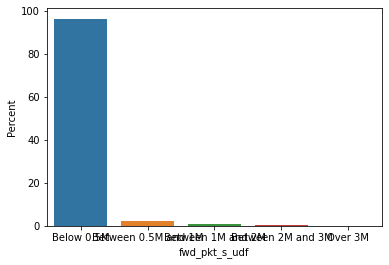

In [ ]:
import seaborn as sns
sns.barplot(x="fwd_pkt_s_udf", y="Percent", data=fwd_pkt_s_tab.toPandas())

## Analytical Method 5 :  Z-Score Calculation
-> I have calculated z-score of all
 the numeric type columns with the help of pandas library. Z-score gives you an idea of how far from the mean
 a data point is. But more technically it’s a measure of how many standard deviations
 below or above the population mean a raw score is.

In [ ]:
# Analytical method 5


import pandas as pd

# Limit the dataframe by taking 100K rows, because the dataframe size is huge
# which cannot be converted into pandas dataframe as the driver memory can't contain it
IDS2 = IDS.limit(100000)

# Convert into Pandas dataframe
pd_IDS = IDS2.toPandas()

# Select only numeric type columns
pd_IDS = pd_IDS.select_dtypes('number')

# Make a list of columns
cols = list(pd_IDS.columns)

# Iterate through all the columns to determine z-score using following formula : z = (x – μ) / σ
# where μ is population mean, σ is population standard deviation
for col in cols:
    col_zscore = col + '_zscore'
    pd_IDS[col_zscore] = (pd_IDS[col] - pd_IDS[col].mean())/pd_IDS[col].std(ddof=0)

pd_IDS



,Dst Port,Protocol,flow_duration,tot_fw_pk,tot_bw_pk,tot_l_fw_pkt,tot_l_bw_pkt,Fwd_Pkt_Len_Max,Fwd Pkt Len Min,fwd_pkt_size_avg,...,Fwd Act Data Pkts_zscore,Fwd Seg Size Min_zscore,Active Mean_zscore,Active Std_zscore,Active_Max_zscore,Active_Min_zscore,Idle Mean_zscore,Idle Std_zscore,Idle_Max_zscore,Idle_Min_zscore
0,0,0,112641719,3,0,0,0.0,0,0,0.000000,...,-0.007594,-37.962947,-0.004191,NaN,-0.004191,-0.004191,39.511639,33.682964,39.511655,39.511623
1,0,0,112641466,3,0,0,0.0,0,0,0.000000,...,-0.007594,-37.962947,-0.004191,NaN,-0.004191,-0.004191,39.511550,27.695728,39.511554,39.511547
2,0,0,112638623,3,0,0,0.0,0,0,0.000000,...,-0.007594,-37.962947,-0.004191,NaN,-0.004191,-0.004191,39.510553,73.027656,39.510649,39.510456
3,22,6,6453966,15,10,1239,2273.0,744,0,82.600000,...,18.440073,-7.568821,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466
4,22,6,8804066,14,11,1143,2209.0,744,0,81.642857,...,18.440073,-7.568821,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,21,6,2,1,1,0,0.0,0,0,0.000000,...,-0.007594,0.029710,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466
99996,21,6,31,1,1,0,0.0,0,0,0.000000,...,-0.007594,0.029710,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466
99997,21,6,1,1,1,0,0.0,0,0,0.000000,...,-0.007594,0.029710,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466
99998,21,6,2,1,1,0,0.0,0,0,0.000000,...,-0.007594,0.029710,-0.004191,NaN,-0.004191,-0.004191,-0.025466,-0.016621,-0.025466,-0.025466


## Analytical Method 6 : Showing each HTTP/HTTPS port attacked with its count in a pie chart to better visualise which port is attacked more frequently

1. Used a simple query with In to select only the HTTP/HTTPS port attacked with its count.
2. Converting the data ito Pandas for graphical presentation
3. Plotting the graph into Pie chart

From the result PORT 80 is attacked more frequently than others

+-----+-------+
|ports| counts|
+-----+-------+
|  443| 609185|
| 8080| 281815|
|   80|1993123|
| 8443|      6|
+-----+-------+



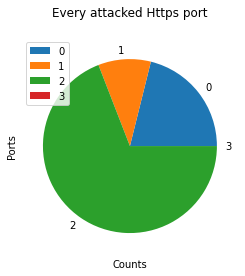

In [ ]:
# Analytical method 6

import matplotlib.pyplot as plot
df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")
sqlDF = spark.sql("SELECT `Dst Port` as ports, count(*) as counts from ca where `Dst Port` in (80, 443, 8080, 8443)   group by `Dst Port`;")
sqlDF.show()
sqlDF = sqlDF.toPandas()
sqlDF.plot(x ='ports', y='counts', kind = 'pie')

plot.title('Every attacked Https port\n')
plot.ylabel('Ports')
plot.legend()
plot.xlabel('Counts')
plot.show()




## Analytical Method 7
### Density Plot to show the total_packets_forwarded in the attack carried along with the density

- create a list of columns and attacks
- Use SELECT and WHERE from pyspark module
- Creating two different df for a particular date
- use pandas module to plot a density plot with labels

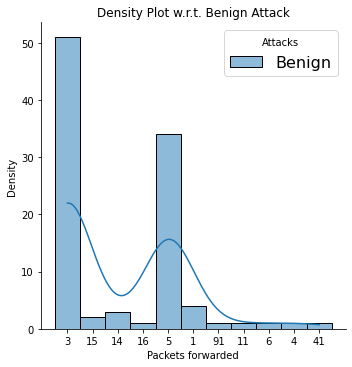

In [ ]:
# Analytical method 7

# Creating list for attacks and columns
attack_labels = ['Benign']
cols = ['tot_fwd_pkts', 'tot_bwd_pkts', 'flow_duration', 'label']
import pandas as pd
# query saving into df
crwk_df_spark1 = IDS_df.select(cols).where( "label = 'Benign'").limit(100)

# pandas df from spark df
crwk_df_pd1 = crwk_df_spark1.toPandas()

for i in attack_labels:
    sub_set = crwk_df_pd1[crwk_df_pd1['label'] == i]
    # density plot
    sns.displot(sub_set['tot_fwd_pkts'],  kde = True, label = i)
    # sns.displot(subset_2['tot_bwd_pkts'] , kde = True, label = i)
    plt.legend(prop={'size': 16}, title = 'Attacks')
    # Added title to the plot
    plt.title('Density Plot w.r.t. Benign Attack')
    # X axis label
    plt.xlabel('Packets forwarded')
    # Y axis label
    plt.ylabel('Density')
    plt.show()
# density plot shows the total packets forwarded during the attack with density


22/12/16 02:35:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 112640768, 3, 0, Benign
 Schema: Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Label
Expected: Flow Duration but found: 112640768
CSV file: file:///Users/macbook/Downloads/notebook_cn7031/02-16-2018.csv
22/12/16 02:35:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 112641158, 3, 0, Benign
 Schema: Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Label
Expected: Flow Duration but found: 112641158
CSV file: file:///Users/macbook/Downloads/notebook_cn7031/02-15-2018.csv


22/12/16 02:35:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 37953, 5, 3, Benign
 Schema: Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Label
Expected: Flow Duration but found: 37953
CSV file: file:///Users/macbook/Downloads/notebook_cn7031/02-21-2018.csv
22/12/16 02:35:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 20553406, 10, 7, Benign
 Schema: Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Label
Expected: Flow Duration but found: 20553406
CSV file: file:///Users/macbook/Downloads/notebook_cn7031/02-22-2018.csv
22/12/16 02:35:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 1532698, 11, 11, Benign
 Schema: Flow Duration, Tot Fwd Pkts, Tot Bwd Pkts, Label
Expected: Flow Duration but found: 1532698
CSV file: file:///Users/macbook/Downloads/notebook_cn7031/02-23-2018.csv
22/12/16 02:35:32 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: 141385, 9, 7, Benign
 Schema: Flow Dura

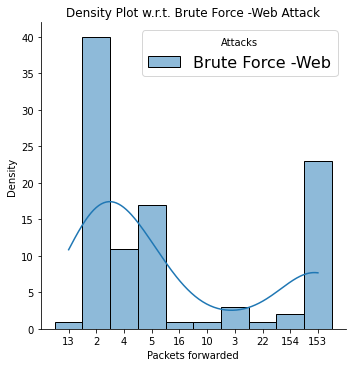

In [ ]:
attack_label = ['Brute Force -Web']
cols = ['tot_fwd_pkts', 'tot_bwd_pkts', 'flow_duration', 'label']
crwk_df_spark2= IDS_df.select(cols).where( "label = 'Brute Force -Web'").limit(100)
crwk_df_pd2 = crwk_df_spark2.toPandas()

for i in attack_label:
    sub_set = crwk_df_pd2[crwk_df_pd2['label'] == i]
    # density plot
    sns.displot(sub_set['tot_fwd_pkts'],  kde = True, label = i)
    # sns.displot(subset_2['tot_bwd_pkts'] , kde = True, label = i)
    plt.legend(prop={'size': 16}, title = 'Attacks')
    # Added title to the plot
    plt.title('Density Plot w.r.t. Brute Force -Web Attack')
    # X axis label
    plt.xlabel('Packets forwarded')
    # Y axis label
    plt.ylabel('Density')



# **Task 2 - Part2 : Machine Learning**

---


## Machine Learning Technique: Decision Tree Classifier

**What to achieve:** To create a training model that can be used to predict the class
or value of the target variable by learning simple decision rules inferred
from prior data(training data). In Decision Trees, for predicting a class label
for a record we start from the root of the tree

In [ ]:
# Machine Learning Technique



from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col

IDS_df_new = IDS_df
IDS_df_new = IDS_df_new.na.drop()


indexer = StringIndexer(inputCol='Label', outputCol='Label_Index')
indexer = indexer.fit(IDS_df_new).transform(IDS_df_new)

indexer.show(10)

indexer =indexer.drop('Timestamp','Label')

features = VectorAssembler(inputCols=indexer.columns[:-1], outputCol='Features')
feature_vector = features.transform(indexer)

feature_data = feature_vector.select('Features','Label_Index')
feature_data.show(10)



+--------+--------+-------------------+-------------+------------+------------+---------------+---------------+---------------+---------------+----------------+---------------+---------------+---------------+----------------+---------------+---------------+-------------+----------------+----------------+------------+------------+------------+----------------+----------------+-----------+-----------+-----------+----------------+----------------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+-------------+------------+-----------+-----------+--------------+--------------+----------------+------------+------------+------------+------------+------------+------------+--------------+------------+-------------+--------------+----------------+----------------+--------------+--------------+----------------+--------------+--------------+----------------+----------------+----------------+----------------+----------------+-------------

In [ ]:
# Splitting data into Training (70% of data) and Testing set (30% of data) that
# is 7:3 ratio
(Train, Test) = feature_data.randomSplit([0.7,0.3])

# Training the model with DecisionTreeClassifier Classification algorithm
DT = DecisionTreeClassifier(featuresCol = 'Features', labelCol = 'Label_Index',impurity='entropy', maxDepth=5,seed=1000)
Model_1 = DT.fit(Train)

In [ ]:
#Testing the Model
Model_1_pred = Model_1.transform(Test)

# Obtaining Accuracy of the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Evaluator = MulticlassClassificationEvaluator(labelCol="Label_Index",\
                                              predictionCol="prediction",\
                                              metricName="accuracy")

Model_1_accuracy = Evaluator.evaluate(Model_1_pred)

print("The accuracy of the Decision Tree Classifier model is:" , Model_1_accuracy*100)

The accuracy of the Decision Tree Classifier model is: 98.38842834082024


In [ ]:
# Generation of the Decision Tree
print(Model_1.toDebugString)


DecisionTreeClassificationModel: uid=DecisionTreeClassifier_eddfd6256b79, depth=5, numNodes=45, numClasses=13, numFeatures=78
  If (feature 69 <= 30.0)
   If (feature 66 <= 32509.0)
    If (feature 0 <= 7654.0)
     If (feature 68 <= 83.5)
      Predict: 0.0
     Else (feature 68 > 83.5)
      If (feature 4 <= 0.5)
       Predict: 9.0
      Else (feature 4 > 0.5)
       Predict: 0.0
    Else (feature 0 > 7654.0)
     If (feature 0 <= 8252.5)
      If (feature 24 <= 274.5)
       Predict: 0.0
      Else (feature 24 > 274.5)
       Predict: 3.0
     Else (feature 0 > 8252.5)
      If (feature 13 <= 136.83333335)
       Predict: 0.0
      Else (feature 13 > 136.83333335)
       Predict: 3.0
   Else (feature 66 > 32509.0)
    If (feature 0 <= 101.5)
     If (feature 21 <= 367.0)
      If (feature 66 <= 33521.0)
       Predict: 1.0
      Else (feature 66 > 33521.0)
       Predict: 0.0
     Else (feature 21 > 367.0)
      If (feature 19 <= 67444.0)
       Predict: 1.0
      Else (feature 19 

In [ ]:
# Confusion Matrix Generation
from sklearn.metrics import confusion_matrix

Prediction_Model = Model_1_pred.select("prediction").collect()
Actual_Model = Model_1_pred.select("Label_Index").collect()

Confusion_Matrix = confusion_matrix(Actual_Model, Prediction_Model)

print("The Confusion Matrix for the Decision Tree Classifier is as below:")
print(Confusion_Matrix)

The Confusion Matrix for the Decision Tree Classifier is as below:
[[1593320     287      16      94       0       0      14     154      12
        0       0       0       0]
 [     18  205402       0       0       0       0       0       0       0
        0       0       0       0]
 [    374       0  136426       0       0       0       0    1089     302
        0       0       0       0]
 [    116       0       0   85581       0       0       0       0       0
        0       0       0       0]
 [      0       0       0       0   45484       0   12531       0       0
        0       0       0       0]
 [      3       0       0       0       4   56205       5       0       0
        0       0       0       0]
 [      0       0       0       0   18878       0   23103       0       0
        0       0       0       0]
 [      0       0       4       0       0       0       0   12481     159
        0       0       0       0]
 [     34       0     279       0       0       0       0    

## Machine Learning Technique: Random Forest Classifier

**What to achieve:** To  build decision trees on different samples and takes their
majority vote for classification and average in case of regression

In [ ]:
# Machine Learning Technique


from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier

# Assign to another dataframe variable
IDS_df_new = IDS_df

# Remove null values
IDS_df_new = IDS_df_new.na.drop()
IDS_df_new = IDS_df_new.dropna()

indexer = StringIndexer(inputCol='Label', outputCol='Label_Index')
indexer = indexer.fit(IDS_df_new).transform(IDS_df_new)

indexer =indexer.drop('Timestamp','Label')

features = VectorAssembler(inputCols=indexer.columns[:-1], outputCol='Features')
feature_vector = features.transform(indexer)

final_data = feature_vector.select('Features','Label_Index')
final_data.show(5)



+--------------------+-----------+
|            Features|Label_Index|
+--------------------+-----------+
|(78,[2,3,16,17,18...|        0.0|
|(78,[2,3,16,17,18...|        0.0|
|(78,[2,3,16,17,18...|        0.0|
|(78,[0,1,2,3,4,5,...|        0.0|
|(78,[0,1,2,3,4,5,...|        0.0|
+--------------------+-----------+
only showing top 5 rows



In [ ]:
# Spliting the dataset in 8:2 ratio
(train_set, test_set) = final_data.randomSplit([0.8,0.2])

from pyspark.ml.classification import RandomForestClassifier

# Training the model with RandomForestClassifier Classification algorithm
RF = RandomForestClassifier(featuresCol = 'Features', labelCol = 'Label_Index')
Model_2 = RF.fit(train_set)

#Testing the Model
Model_2_pred = Model_2.transform(test_set)

# Obtaining Accuracy of the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Evaluator = MulticlassClassificationEvaluator(labelCol="Label_Index",\
                                              predictionCol="prediction",\
                                              metricName="accuracy")

Model_2_accuracy = Evaluator.evaluate(Model_2_pred)

print("The accuracy of the Random Forest Classifier model is:" , Model_2_accuracy*100)

The accuracy of the Random Forest Classifier model is: 97.87429748482813


In [ ]:
print(Model_2.toDebugString)

RandomForestClassificationModel: uid=RandomForestClassifier_e401443c7939, numTrees=20, numClasses=13, numFeatures=78
  Tree 0 (weight 1.0):
    If (feature 53 <= 0.20833333335)
     If (feature 21 <= 169759.5)
      If (feature 25 <= 299.5)
       If (feature 29 <= 0.5)
        If (feature 0 <= 38.0)
         Predict: 4.0
        Else (feature 0 > 38.0)
         Predict: 0.0
       Else (feature 29 > 0.5)
        Predict: 0.0
      Else (feature 25 > 299.5)
       If (feature 0 <= 5366.5)
        If (feature 37 <= 59.28106568495)
         Predict: 2.0
        Else (feature 37 > 59.28106568495)
         Predict: 1.0
       Else (feature 0 > 5366.5)
        If (feature 24 <= 932.5)
         Predict: 3.0
        Else (feature 24 > 932.5)
         Predict: 0.0
     Else (feature 21 > 169759.5)
      Predict: 0.0
    Else (feature 53 > 0.20833333335)
     If (feature 16 <= 95.8061285418)
      If (feature 0 <= 107.5)
       If (feature 43 <= 30389.368055555547)
        If (feature 69 <= 22.

In [ ]:
# Confusion Matrix Generation
from sklearn.metrics import confusion_matrix

Prediction_Model = Model_2_pred.select("prediction").collect()
Actual_Model = Model_2_pred.select("Label_Index").collect()

Confusion_Matrix = confusion_matrix(Actual_Model, Prediction_Model)

print("The Confusion Matrix for the Random Forest Classifier is as below:\n")
print(Confusion_Matrix)

The Confusion Matrix for the Random Forest Classifier is as below:

[[1060069     582     375      19       0       4       0       0       0
        0       0       0       0]
 [    101  136543       0       0       0       0       0       0       0
        0       0       0       0]
 [   3552     686   88254       0       0       0       0       0       0
        0       0       0       0]
 [   1205       0       0   56059       0       0       0       0       0
        0       0       0       0]
 [      0       0       0       0   35789       0    2503       0       0
        0       0       0       0]
 [      5       0       0       0       7   37562       2       0       0
        0       0       0       0]
 [      0       0       0       0   13656       0   14311       0       0
        0       0       0       0]
 [   6574       0       2       0       0       0       0    1681       0
        0       0       0       0]
 [   1269       0       0       0       0       0       0   

## Machine Learning Technique: Logistic Regression

**Machine Learning to evaluate using LogisticRegression model**

1. Renamed "Flow Duration" to flow_duration for convinience
2. Dropped NULL values to reduce dataset
3. Used StingIndexer to encode label as inputCol

4. Use VectorAssembler to create output column as features
5. Created a pipeline to fit the assembler
6. Splitted the datasets into 3 parts as trainDS, testDS and validationDs as training, testing and validation datasets respectively.
7.performed LogisticRegression
8. trained the model using trainDs which is training datasets.
9. output is shown below predicting the attack for this system.


In [ ]:
# Machine Learning Technique

from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
spark = SparkSession.builder.getOrCreate()
from pyspark.ml.classification import NaiveBayes

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, Normalizer,StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as mc_eval


df = spark.read.option("header", "true").csv("/content/drive/MyDrive/IDS2018/*.csv")

df = df.select(col("Flow Duration").alias("flow_duration"),col("Label").alias('label'))

df = df.na.drop()
df = df.withColumn("flow_duration", df.flow_duration.cast("integer"))

# encoding the label column
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="label", outputCol="labelEncoded")
indxd= indexer.fit(df).transform(df)
indxd.take(5)

assembler = VectorAssembler(inputCols=indxd.drop('Label').drop('labelEncoded').columns, outputCol='features', handleInvalid='skip')

pipeline = Pipeline(stages=[assembler])

dataframes = pipeline.fit(indxd).transform(indxd)


dataframes.show()
split = dataframes.randomSplit([0.6, 0.2, 0.2], seed=26)

trainDS = split[0]
testDS = split[1]
validationDs = split[2]


lr = LogisticRegression(labelCol='labelEncoded',featuresCol='features')

model = lr.fit(trainDS)

pred = model.transform(testDS)


eval = mc_eval(predictionCol='prediction', labelCol='labelEncoded')
eval.evaluate(pred)





+-------------+------+------------+--------------+
|flow_duration| label|labelEncoded|      features|
+-------------+------+------------+--------------+
|    112641719|Benign|         0.0|[1.12641719E8]|
|    112641466|Benign|         0.0|[1.12641466E8]|
|    112638623|Benign|         0.0|[1.12638623E8]|
|      6453966|Benign|         0.0|   [6453966.0]|
|      8804066|Benign|         0.0|   [8804066.0]|
|      6989341|Benign|         0.0|   [6989341.0]|
|    112640480|Benign|         0.0| [1.1264048E8]|
|    112641244|Benign|         0.0|[1.12641244E8]|
|       476513|Benign|         0.0|    [476513.0]|
|       475048|Benign|         0.0|    [475048.0]|
|       474926|Benign|         0.0|    [474926.0]|
|       477471|Benign|         0.0|    [477471.0]|
|       512758|Benign|         0.0|    [512758.0]|
|       476711|Benign|         0.0|    [476711.0]|
|       476616|Benign|         0.0|    [476616.0]|
|       477161|Benign|         0.0|    [477161.0]|
|       474670|Benign|         

0.6107283137919562

## Machine Learning Technique: LogisticRegression model and evaluation
- Feature engineering is the first step; which includes dropping 'timestamp' col because it different then other rows so might not be useful.
- Dropping null values
- Encoding label col
- creating feature vector for the cols using assembler.
- creating a pipeline to fit tranform assembler
- Logistic Regression Classifier then evealuation of model.






In [ ]:
# Machine Learning Technique

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator as mc_eval
IDS2018_df_ml = IDS_df.drop('timestamp').drop('protocol').drop('dst_port')
# encoding the label column
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="label", outputCol="labelEncoded")
IDS2018_df_indexed= indexer.fit(IDS2018_df_ml).transform(IDS2018_df_ml)
# IDS2018_df_indexed.take(5)

In [ ]:
IDS2018_df_indexed.show(3)

+-------------+------------+------------+----------------+----------------+--------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-----------+------------+------------+--------------+------------+------------+-----------+-----------+--------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+------------+----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+------------+-----------------+----------------+----------+----------+----

In [ ]:
# IDS2018_df_indexed = IDS2018_df #creating a df for correlation
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_blk_rate_avg", IDS2018_df_indexed.fwd_blk_rate_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_blk_rate_avg", IDS2018_df_indexed.fwd_blk_rate_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_duration", IDS2018_df_indexed.flow_duration.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_pkt_len_std", IDS2018_df_indexed.fwd_pkt_len_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("tot_bwd_pkts", IDS2018_df_indexed.tot_bwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("tot_len_fwd_pkts", IDS2018_df_indexed.tot_len_fwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("tot_len_bwd_pkts", IDS2018_df_indexed.tot_len_bwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fw_pkt_len_max", IDS2018_df_indexed.fw_pkt_len_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fw_pkt_len_min", IDS2018_df_indexed.fw_pkt_len_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_pkt_len_avg", IDS2018_df_indexed.fwd_pkt_len_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkt_len_max", IDS2018_df_indexed.bwd_pkt_len_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkt_len_min", IDS2018_df_indexed.bwd_pkt_len_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkt_len_avg", IDS2018_df_indexed.bwd_pkt_len_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkt_len_std", IDS2018_df_indexed.bwd_pkt_len_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_byts_s", IDS2018_df_indexed.flow_byts_s.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_pkts_s", IDS2018_df_indexed.flow_pkts_s.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_iat_avg", IDS2018_df_indexed.flow_iat_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_iat_std", IDS2018_df_indexed.flow_iat_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_iat_max", IDS2018_df_indexed.flow_iat_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("flow_iat_min", IDS2018_df_indexed.flow_iat_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_iat_tot", IDS2018_df_indexed.fwd_iat_tot.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_iat_avg", IDS2018_df_indexed.fwd_iat_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_iat_std", IDS2018_df_indexed.fwd_iat_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_iat_max", IDS2018_df_indexed.fwd_iat_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_iat_min", IDS2018_df_indexed.fwd_iat_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_iat_tot", IDS2018_df_indexed.bwd_iat_tot.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_iat_avg", IDS2018_df_indexed.bwd_iat_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_iat_std", IDS2018_df_indexed.bwd_iat_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_iat_min", IDS2018_df_indexed.bwd_iat_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_iat_max", IDS2018_df_indexed.bwd_iat_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_psh_flags", IDS2018_df_indexed.fwd_psh_flags.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_psh_flags", IDS2018_df_indexed.bwd_psh_flags.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_urg_flags", IDS2018_df_indexed.fwd_urg_flags.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_urg_flags", IDS2018_df_indexed.bwd_urg_flags.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_header_len", IDS2018_df_indexed.fwd_header_len.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_header_len", IDS2018_df_indexed.bwd_header_len.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_pkts_s", IDS2018_df_indexed.fwd_pkts_s.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkts_s", IDS2018_df_indexed.bwd_pkts_s.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_len_min", IDS2018_df_indexed.pkt_len_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_len_std", IDS2018_df_indexed.pkt_len_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_len_max", IDS2018_df_indexed.pkt_len_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_len_avg", IDS2018_df_indexed.pkt_len_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_len_var", IDS2018_df_indexed.pkt_len_var.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fin_flag_cnt", IDS2018_df_indexed.fin_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("syn_flag_cnt", IDS2018_df_indexed.syn_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("rst_flag_cnt", IDS2018_df_indexed.rst_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("psh_flag_cnt", IDS2018_df_indexed.psh_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("ack_flag_cnt", IDS2018_df_indexed.ack_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("urg_flag_cnt", IDS2018_df_indexed.urg_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("cwe_flag_cnt", IDS2018_df_indexed.cwe_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("ece_flag_cnt", IDS2018_df_indexed.ece_flag_cnt.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("down_up_ratio", IDS2018_df_indexed.down_up_ratio.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("pkt_size_avg", IDS2018_df_indexed.pkt_size_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_seg_size_avg", IDS2018_df_indexed.fwd_seg_size_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_seg_size_avg", IDS2018_df_indexed.bwd_seg_size_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_byts_blk_avg", IDS2018_df_indexed.fwd_byts_blk_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_pkts_blk_avg", IDS2018_df_indexed.fwd_pkts_blk_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_byts_blk_avg", IDS2018_df_indexed.bwd_byts_blk_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_pkts_blk_avg", IDS2018_df_indexed.bwd_pkts_blk_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_blk_rate_avg", IDS2018_df_indexed.bwd_blk_rate_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("subflow_fwd_pkts", IDS2018_df_indexed.subflow_fwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("subflow_fwd_byts", IDS2018_df_indexed.subflow_fwd_byts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("subflow_bwd_pkts", IDS2018_df_indexed.subflow_bwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("subflow_bwd_byts", IDS2018_df_indexed.subflow_bwd_byts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("init_fwd_win_byts", IDS2018_df_indexed.init_fwd_win_byts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("bwd_win_byts", IDS2018_df_indexed.bwd_win_byts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_act_data_pkts", IDS2018_df_indexed.fwd_act_data_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("fwd_seg_size_min", IDS2018_df_indexed.fwd_seg_size_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("active_avg", IDS2018_df_indexed.active_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("active_std", IDS2018_df_indexed.active_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("active_max", IDS2018_df_indexed.active_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("active_min", IDS2018_df_indexed.active_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("idle_avg", IDS2018_df_indexed.idle_avg.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("idle_std", IDS2018_df_indexed.idle_std.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("idle_max", IDS2018_df_indexed.idle_max.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("idle_min", IDS2018_df_indexed.idle_min.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.withColumn("tot_fwd_pkts", IDS2018_df_indexed.tot_fwd_pkts.cast("integer"))
IDS2018_df_indexed = IDS2018_df_indexed.na.drop()


In [ ]:
IDS2018_df_indexed.show(5)

+-------------+------------+------------+----------------+----------------+--------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-----------+-----------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+------------+-----------------+----------------+----------+----------+----------+-

In [ ]:
assembler = VectorAssembler(inputCols=IDS2018_df_indexed.drop('label').columns, outputCol='features', handleInvalid='skip')

In [ ]:
# initiate pipeline
pipeline = Pipeline(stages=[assembler])

# split data into train & test sets
piped_df = pipeline.fit(IDS2018_df_indexed).transform(IDS2018_df_indexed)
piped_df = piped_df.drop('label')
piped_df.show(5)

+-------------+------------+------------+----------------+----------------+--------------+--------------+---------------+---------------+---------------+---------------+---------------+---------------+-----------+-----------+------------+------------+------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-------------+-------------+-------------+-------------+--------------+--------------+----------+----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+-----------------+------------+-----------------+----------------+----------+----------+----------+-

In [ ]:
training, test = piped_df.randomSplit([0.7, 0.3]) #splits

In [ ]:
# instantiate and fit ML model - LogisticRegression
lin_reg = LogisticRegression(labelCol='labelEncoded',featuresCol='features')
LR_Model = lin_reg.fit(training)

In [ ]:
# get predictions
pred = LR_Model.transform(test)

In [ ]:
# evaluating the model
eval = mc_eval(predictionCol='prediction', labelCol='labelEncoded')
eval.evaluate(pred)

0.88648


# **Convert ipynb to HTML**

---



In [ ]:
# install nbconvert
!pip3 install nbconvert


# convert ipynb to html
# file name: "Group115_CN7031.ipynb
!jupyter nbconvert --to html Group115_CN7031.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook Group115_CN7031.ipynb to html
[NbConvertApp] ERROR | Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][80]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stdout',
 'output_type': 'stream',
 'text': '+-------------+------+------------+--------------+\n'
         '|flow_duratio...'}
[NbConvertApp] Writing 1109711 bytes to Group115_CN7031.html
